<a href="https://colab.research.google.com/github/evanzs/curso-spark/blob/master/pyspack_mongodb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# instalar as dependências
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://dlcdn.apache.org/spark/spark-3.5.1/spark-3.5.1-bin-hadoop3.tgz
!tar xf spark-3.5.1-bin-hadoop3.tgz
!pip install -q findspark

# configurar as variáveis de ambiente
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-11-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.5.1-bin-hadoop3"

# tornar o pyspark "importável"
import findspark
findspark.init('spark-3.5.1-bin-hadoop3')


from pyspark.sql import SparkSession


# Configuração do Spark
spark = SparkSession.builder \
    .appName("MongoDBExample") \
    .config("spark.jars.packages", "org.mongodb.spark:mongo-spark-connector_2.12:3.0.0") \
    .getOrCreate()



In [10]:
# df = spark.read.format('mongo').option("uri", "mongodb://localhost:27017/test.collection").load()
uri = "mongodb+srv://evanfidk:<minha_senha>@diagnostico.1bfvz9d.mongodb.net/diagnostico.users?retryWrites=true&w=majority&appName=diagnostico"

df = spark.read.format('mongo').option("uri", uri).load()
df.show()

+---+--------------------+--------------------+--------------------+-----------------+--------------------+------------+--------------------+
|__v|                 _id|           createdAt|               email|             name|            password|      reason|           updatedAt|
+---+--------------------+--------------------+--------------------+-----------------+--------------------+------------+--------------------+
|  0|{6474d7de31a7a1e6...|2023-05-29 16:50:...|evandrofidk@hotma...|evandro fernandes|$2b$04$Num76sJUdm...|       teste|2023-05-29 16:50:...|
|  0|{64bb1e253a41f3e4...|2023-07-22 00:09:...|iana.uliana@unesp.br|iana uliana perez|$2b$04$3aPiJ4NMRr...|    pesquisa|2023-07-22 00:09:...|
|  0|{64e376dc5f674c94...|2023-08-21 14:38:...|       barata@usp.br|            tomas|$2b$04$iTMUxIxug0...|    Pesquisa|2023-08-21 14:38:...|
|  0|{64e55c91fd020a37...|2023-08-23 01:10:...|       e@hotmail.com|               ee|$2b$04$9mabzK6RVt...|          ee|2023-08-23 01:10:...|
|  0|{

**- LENDO E GRAVANDO BANCOS DE DADOS NO MONGODB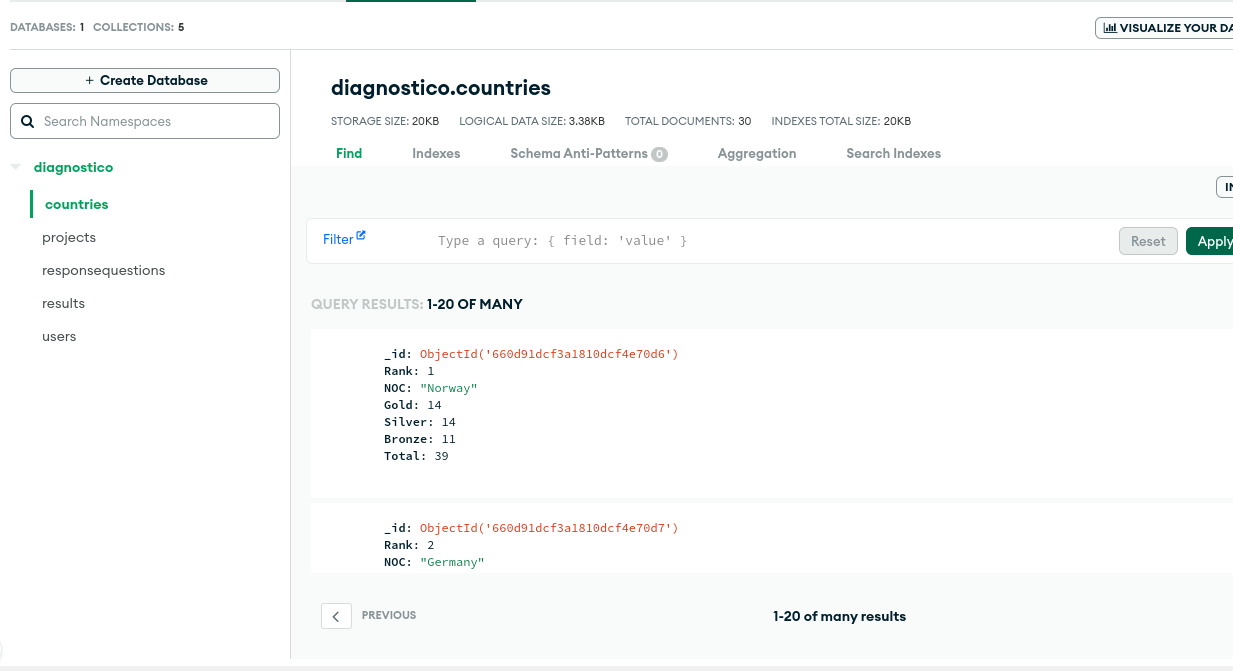**

In [11]:
## baixando uma tabela aleatória para gravar
import pandas as pd

df_countries = pd.read_csv("https://raw.githubusercontent.com/evanzs/curso_ml_minsait/main/Datasets/2018WinterOlympics.csv",sep=',')
df_countries.head(5)

,Rank,NOC,Gold,Silver,Bronze,Total
0,1,Norway,14,14,11,39
1,2,Germany,14,10,7,31
2,3,Canada,11,8,10,29
3,4,United States,9,8,6,23
4,5,Netherlands,8,6,6,20


** SALVANDO NOVO TABELA NO MONGO DB**

In [14]:
## salvando no banco de dados

dfw_countries = spark.createDataFrame(df_countries)
dfw_countries.show(5)

uri = "mongodb+srv://evanfidk:<minha_senha>@diagnostico.1bfvz9d.mongodb.net/diagnostico.countries?retryWrites=true&w=majority&appName=diagnostico"

dfw_countries.write.format("mongo").option("uri",uri).option("dbtable","countries").save()

+----+-------------+----+------+------+-----+
|Rank|          NOC|Gold|Silver|Bronze|Total|
+----+-------------+----+------+------+-----+
|   1|       Norway|  14|    14|    11|   39|
|   2|      Germany|  14|    10|     7|   31|
|   3|       Canada|  11|     8|    10|   29|
|   4|United States|   9|     8|     6|   23|
|   5|  Netherlands|   8|     6|     6|   20|
+----+-------------+----+------+------+-----+
only showing top 5 rows



** LENDO NOVA TABELA SALVA NO MONGO DB CHAMADA COUNTRIES NO MONGO DB**

In [15]:
## lendo diretamente no banco do mongo.

df_new_countries = spark.read.format('mongo').option("uri", uri).load()
df_new_countries.show(5)

+------+----+-------------+----+------+-----+--------------------+
|Bronze|Gold|          NOC|Rank|Silver|Total|                 _id|
+------+----+-------------+----+------+-----+--------------------+
|    11|  14|       Norway|   1|    14|   39|{660d91dcf3a1810d...|
|     7|  14|      Germany|   2|    10|   31|{660d91dcf3a1810d...|
|    10|  11|       Canada|   3|     8|   29|{660d91dcf3a1810d...|
|     6|   9|United States|   4|     8|   23|{660d91dcf3a1810d...|
|     6|   8|  Netherlands|   5|     6|   20|{660d91dcf3a1810d...|
+------+----+-------------+----+------+-----+--------------------+
only showing top 5 rows



**PRINT DO RESULTADO, NOVA TABELA CRIADA**
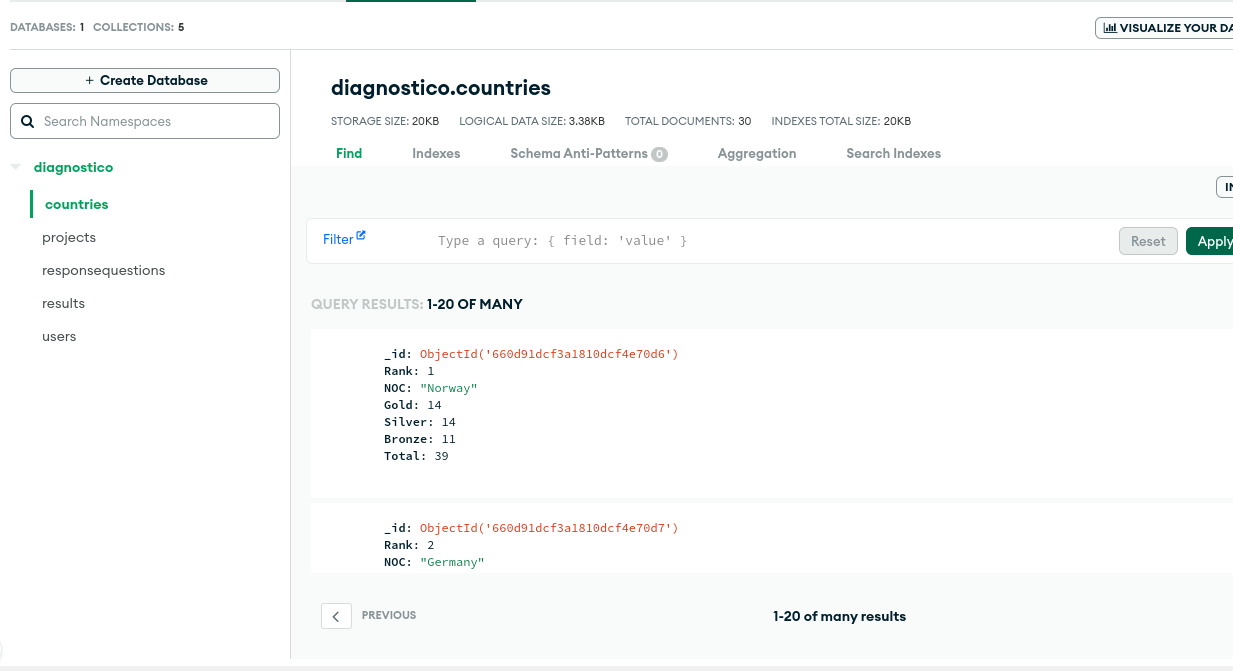